### STEP FUNCTION (PART 2)
with Lax-Wendfroff 

In [81]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 301    #changing nx the resolution change (J)
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.8
dt = cf*dx/a   # Time step we will come back to this 
t_final = 20.0 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt) #how many iteration


# Define the initial condition
u_initial=np.where((x<6) & (x>4),1,0)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 301
dx= 0.03333333333333333
dt= 0.02666666666666667
Number of iterations= 750.0


In [82]:
import matplotlib.pyplot as plt
import os

os.makedirs('./2LaxWendroff', exist_ok=True)

os.listdir('./');

In [83]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./2LaxWendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final: #UNTIL THE FINAL TIME 
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + 0.5*(a*dt/dx)**2*(np.roll(u_current, -1)+ np.roll(u_current, 1)- 2*u_current)  #as done in lecture 
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.2,1.1)
        plt.savefig('./2LaxWendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
    
np.save('./2LaxWendroff/l2norm'+str(nx)+'.npy', np.array(l2norm)) 
np.save('./2LaxWendroff/time'+str(nx)+'.npy', np.array(time))


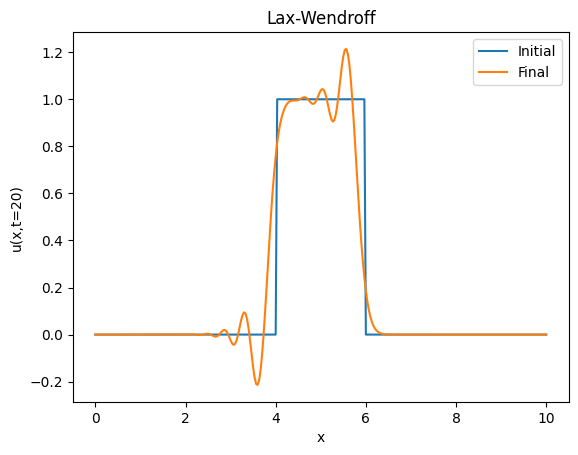

In [84]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Lax-Wendroff')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./2LaxWendroff/final'+str(nx)+'.png', dpi=200)
plt.show()

In [85]:
# set the directory where your images are stored
directory = "./2LaxWendroff/"

# get the list of image files in the directory
files = os.listdir(directory)

# sort the files in alphanumeric order
files=sorted(files)

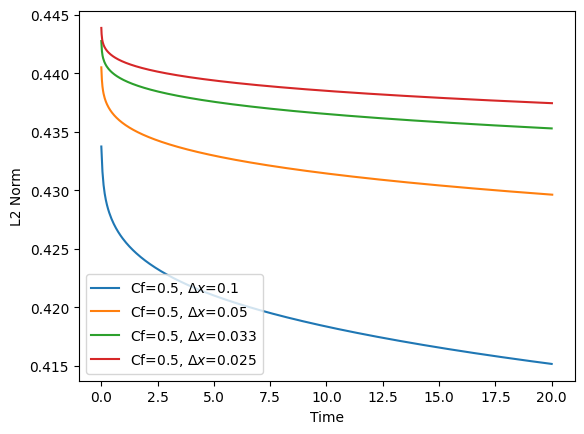

In [86]:
#Compare with data stored

norm1=np.load('./2LaxWendroff/l2norm101.npy')
time1=np.load('./2LaxWendroff/time101.npy')
norm2=np.load('./2LaxWendroff/l2norm201.npy')
time2=np.load('./2LaxWendroff/time201.npy')
norm3=np.load('./2LaxWendroff/l2norm301.npy')
time3=np.load('./2LaxWendroff/time301.npy')
norm4=np.load('./2LaxWendroff/l2norm401.npy')
time4=np.load('./2LaxWendroff/time401.npy')

plt.plot(time1,norm1, label='Cf=0.5, $\Delta x$=0.1')
plt.plot(time2,norm2, label='Cf=0.5, $\Delta x$=0.05')
plt.plot(time3,norm3, label='Cf=0.5, $\Delta x$=0.033')
plt.plot(time4,norm4, label='Cf=0.5, $\Delta x$=0.025')

plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.legend()
plt.savefig('./2LaxWendroff/norms'+str(nx)+'.png', dpi=200)
plt.show()